In [1]:
from reinforce_lake import PolicyNetwork, reinforce
from spsa_lake import spsa_x, spsa
from torch import optim
import gym
import matplotlib.pyplot as plt
import pandas as pd
import torch
from gridworld import CustomGridWorld
import numpy as np


In [2]:
def run_with_seed(seed):
    torch.manual_seed(seed)
    env = CustomGridWorld(4, 0.2, 50)
    n_actions = 4
    n_features = 6  # Based on our extract_features function

    policy = PolicyNetwork(n_features, n_actions)

    # results = spsa_x(env, policy, 10000, num_trials=10, num_perts=5, x=1)
    optimizer = torch.optim.Adam(policy.parameters(), lr=3e-5)

    results = spsa(env, policy, optimizer, 50000, num_trials=10)
    return results


Episode 0, Average Reward: 0, G=-2.9893874920021717
Episode 100, Average Reward: 0, G=5.654633644353561
Episode 200, Average Reward: 0, G=12.549000059460608
Episode 300, Average Reward: 0, G=4.189878147899108
Episode 400, Average Reward: 0, G=0.7563738994195518
Episode 500, Average Reward: 0, G=3.91173884336177
Episode 600, Average Reward: 0, G=-3.2508269707335797
Episode 700, Average Reward: 0, G=-7.098826136254712
Episode 800, Average Reward: 0, G=0.22026363108133626
Episode 900, Average Reward: 0, G=0.49404839937900047
Episode 1000, Average Reward: 0, G=2.1381631734857582
Episode 1100, Average Reward: 0, G=4.764141154279406
Episode 1200, Average Reward: 0, G=-0.18869529778406546
Episode 1300, Average Reward: 0, G=5.319929883425478
Episode 1400, Average Reward: 0, G=-0.7080713999913028
Episode 1500, Average Reward: 0, G=6.867629651943804
Episode 1600, Average Reward: 0, G=4.640601841421538
Episode 1700, Average Reward: 0, G=0.08781438063005523
Episode 1800, Average Reward: 0, G=2.217

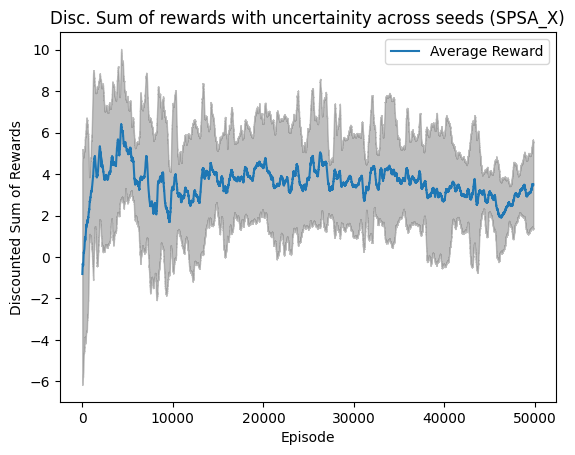

In [3]:
results = [
    run_with_seed(seed) for seed in range(10)
]
rolled_up = []
for result in results:
    r = pd.Series(result).rolling(200).mean().dropna()
    rolled_up.append(r)
rolled_up = np.array(rolled_up)

avg_rewards = rolled_up.mean(0)
std_rewards = rolled_up.std(0)

plt.plot(avg_rewards, label="Average Reward")
plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, color='gray', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Discounted Sum of Rewards')
plt.title('Disc. Sum of rewards with uncertainity across seeds (SPSA_X)')
plt.legend()
plt.show()


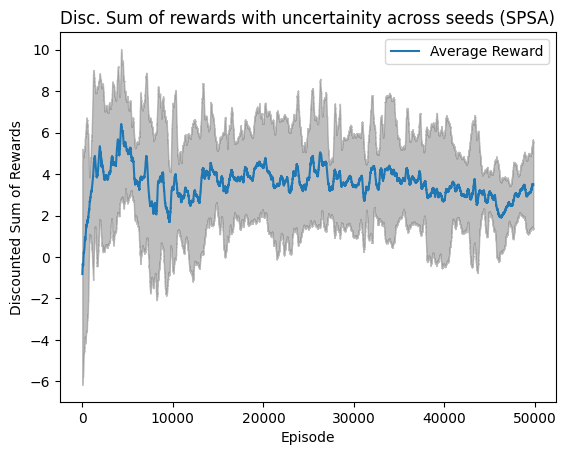

In [5]:
rolled_up = []
for result in results:
    r = pd.Series(result).rolling(200).mean().dropna()
    rolled_up.append(r)
rolled_up = np.array(rolled_up)

avg_rewards = rolled_up.mean(0)
std_rewards = rolled_up.std(0)

plt.plot(avg_rewards, label="Average Reward")
plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, color='gray', alpha=0.5)
plt.xlabel('Episode')
plt.ylabel('Discounted Sum of Rewards')
plt.title('Disc. Sum of rewards with uncertainity across seeds (SPSA)')
plt.legend()
plt.show()
